<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

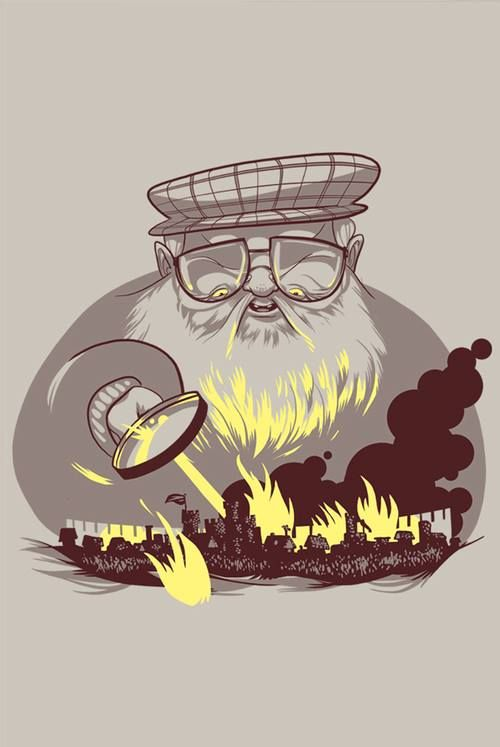

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 37.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data_nan = data.isna().sum(axis=0).to_frame(name='Количество NaN')
data_nan

,Количество NaN
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [5]:
percentage_nan = []
for ind, _ in enumerate(list(data.columns)):
  percentage_nan.append(round(data[data.columns[ind]].isna().sum(axis=0)/len(data[data.columns[ind]]) * 100, 3))

data_nan['Процент NaN'] = percentage_nan
data_nan

,Количество NaN,Процент NaN
name,0,0.000
title,840,53.950
male,0,0.000
culture,1069,68.658
dateOfBirth,1278,82.081
mother,1539,98.844
father,1535,98.587
heir,1536,98.651
house,381,24.470
spouse,1357,87.155


Text(0.5, 1.0, 'Процент пропущенных значений в каждом столбце')

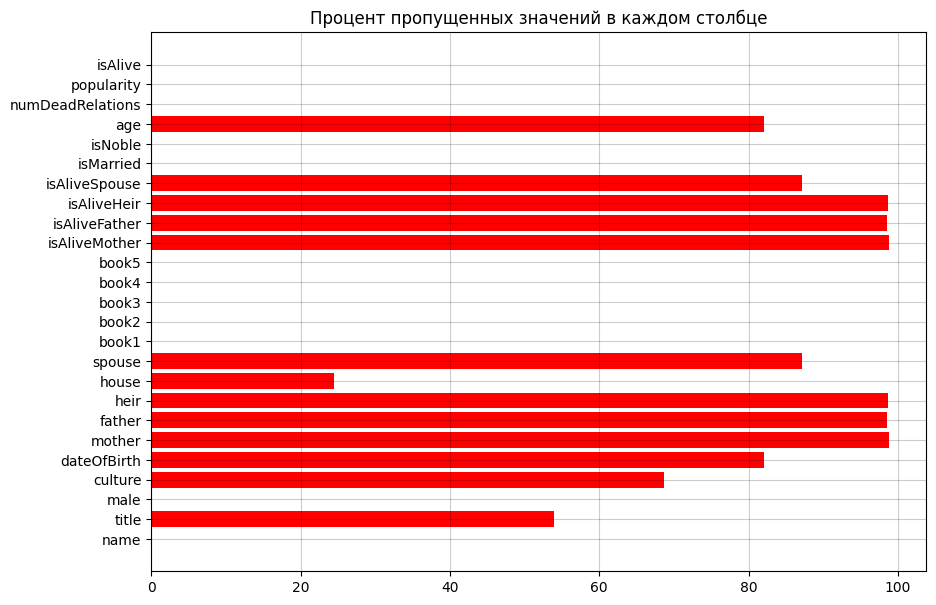

In [6]:
plt.figure(figsize=(10, 7))
plt.grid(color='black', alpha=0.2)
plt.barh(data_nan.index, data_nan['Процент NaN'], color='red')
plt.title('Процент пропущенных значений в каждом столбце')

In [7]:
for column in data.columns:
  if data_nan.loc[column, 'Процент NaN'] > 80:
      data.drop(column, axis=1, inplace=True)

data.drop('name', axis=1, inplace=True)

data

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,0,0.160535,1
1554,NaN,0,NaN,NaN,1,1,0,0,0,0,0,0,0.040134,0
1555,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   house             1176 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  numDeadRelations  1557 non-null   int64  
 12  popularity        1557 non-null   float64
 13  isAlive           1557 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 182.5+ KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [11]:
isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), data['popularity']))
data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations

data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)
data

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1,1
3,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,1,0,0
4,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,1,0,0
1554,NaN,0,NaN,NaN,1,1,0,0,0,0,0,0,0,0
1555,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,0,0,0,0


In [16]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

data['culture'] = data['culture'].apply(simplify_culture)
data

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1,1
3,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,1,0,0
4,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,1,0,0
1554,NaN,0,NaN,NaN,1,1,0,0,0,0,0,0,0,0
1555,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,0,0,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [18]:
balance_data = data['isAlive'].value_counts(normalize=True) * 100
balance_data

,proportion
isAlive,
1,77.842004
0,22.157996


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)